<a href="https://colab.research.google.com/github/novoforce/Exploring-Tensorflow/blob/main/Edurekha_tf_course/Assignment_4_q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the dataset

In [1]:
!gdown --id 0BxYys69jI14kYVM3aVhKS1VhRUk

Downloading...
From: https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk
To: /content/UTKFace.tar.gz
100% 107M/107M [00:00<00:00, 160MB/s] 


In [ ]:
!tar -xzvf /content/UTKFace.tar.gz -C /content/

In [3]:
!gdown --id 0BxYys69jI14kRjNmM0gyVWM2bHM

Downloading...
From: https://drive.google.com/uc?id=0BxYys69jI14kRjNmM0gyVWM2bHM
To: /content/crop_part1.tar.gz
100% 45.4M/45.4M [00:00<00:00, 142MB/s]


In [ ]:
!tar -xzvf /content/crop_part1.tar.gz -C /content/ 

# Pre-processing the dataset

In [27]:
from imutils import paths
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator 
from keras.applications.mobilenet_v2 import MobileNetV2

In [6]:
dataset_path_1= '/content/UTKFace'
dataset_path_2= '/content/crop_part1'

In [7]:
img_paths= [img_path for img_path in paths.list_images(dataset_path_1)]
print("Total images:> ",len(img_paths),"Image path list:> ",img_paths)


Total images:>  23708 Image path list:>  ['/content/UTKFace/38_0_1_20170113151729239.jpg.chip.jpg', '/content/UTKFace/28_0_0_20170117202533919.jpg.chip.jpg', '/content/UTKFace/40_0_2_20170117000400201.jpg.chip.jpg', '/content/UTKFace/35_0_0_20170117123744051.jpg.chip.jpg', '/content/UTKFace/28_1_2_20170116190120925.jpg.chip.jpg', '/content/UTKFace/1_1_2_20161219153514108.jpg.chip.jpg', '/content/UTKFace/44_0_3_20170119194637443.jpg.chip.jpg', '/content/UTKFace/30_0_0_20170117130654291.jpg.chip.jpg', '/content/UTKFace/26_1_0_20170117201640750.jpg.chip.jpg', '/content/UTKFace/4_0_1_20170110213631827.jpg.chip.jpg', '/content/UTKFace/70_0_0_20170117173731439.jpg.chip.jpg', '/content/UTKFace/39_1_0_20170117190455571.jpg.chip.jpg', '/content/UTKFace/28_0_0_20170117145726220.jpg.chip.jpg', '/content/UTKFace/34_0_0_20170117134918378.jpg.chip.jpg', '/content/UTKFace/30_1_0_20170117171117386.jpg.chip.jpg', '/content/UTKFace/29_1_0_20170117180955948.jpg.chip.jpg', '/content/UTKFace/95_1_0_2017012

In [8]:
#Combining the dataset from UTKFace & crop_part1
for img in paths.list_images(dataset_path_2):
    img_paths.append(img)

print("Total images after combining:> ",len(img_paths),"Image path list:> ",img_paths)

Total images after combining:>  33488 Image path list:>  ['/content/UTKFace/38_0_1_20170113151729239.jpg.chip.jpg', '/content/UTKFace/28_0_0_20170117202533919.jpg.chip.jpg', '/content/UTKFace/40_0_2_20170117000400201.jpg.chip.jpg', '/content/UTKFace/35_0_0_20170117123744051.jpg.chip.jpg', '/content/UTKFace/28_1_2_20170116190120925.jpg.chip.jpg', '/content/UTKFace/1_1_2_20161219153514108.jpg.chip.jpg', '/content/UTKFace/44_0_3_20170119194637443.jpg.chip.jpg', '/content/UTKFace/30_0_0_20170117130654291.jpg.chip.jpg', '/content/UTKFace/26_1_0_20170117201640750.jpg.chip.jpg', '/content/UTKFace/4_0_1_20170110213631827.jpg.chip.jpg', '/content/UTKFace/70_0_0_20170117173731439.jpg.chip.jpg', '/content/UTKFace/39_1_0_20170117190455571.jpg.chip.jpg', '/content/UTKFace/28_0_0_20170117145726220.jpg.chip.jpg', '/content/UTKFace/34_0_0_20170117134918378.jpg.chip.jpg', '/content/UTKFace/30_1_0_20170117171117386.jpg.chip.jpg', '/content/UTKFace/29_1_0_20170117180955948.jpg.chip.jpg', '/content/UTKFac

## Extracting the labels from the image name

In [9]:
img_labels= []
for name in img_paths:
    im_gender= name.split("/")[3].split("_")[1]
    img_labels.append(im_gender)

print("Total no of labels are:> ",len(img_labels))

Total no of labels are:>  33488


## Visualize the images

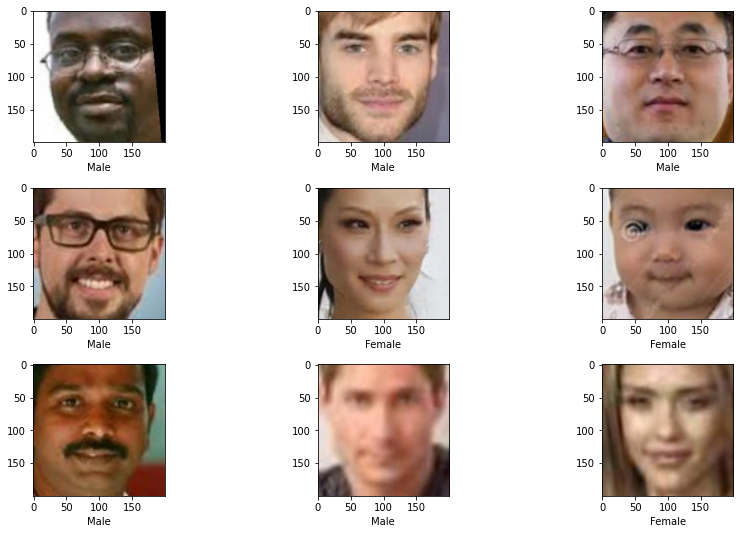

In [10]:
CLASSES= {"0":"Male","1":"Female"}
plt.figure(figsize=(12, 12))
for i in range(0,9):
    plt.subplot(5, 3, i+1)
    image = mpimg.imread(img_paths[i])
    plt.imshow(image) #'image_list' is the list of images
    plt.xlabel(CLASSES[img_labels[i]]) # 'labels' is the list of labels
plt.tight_layout()
plt.show()

In [11]:
#Unique count of each category
from collections import Counter
print(Counter(img_labels).values())
print(Counter(img_labels).keys())

dict_values([16763, 16724, 1])
dict_keys(['0', '1', '3'])


In [13]:
# Cleaning the dataset with wrong labels
count=0
for i in img_labels:
    if i == "3":
        print(count)
    count+=1

32481


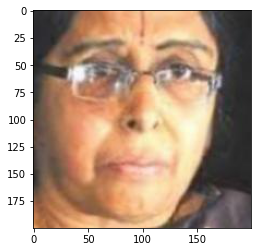

In [14]:
plt.imshow(mpimg.imread(img_paths[32481]))

In [16]:
print(img_paths[32481])
img_paths.remove('/content/crop_part1/61_3_20170109150557335.jpg.chip.jpg')
len(img_paths)

/content/crop_part1/61_3_20170109150557335.jpg.chip.jpg


33487

In [18]:
img_labels.remove("3")

In [19]:
len(img_labels)

33487

## Dataset health

In [20]:
print("The unique category counts are:> ",Counter(img_labels).values(),"for Females and Male respectively")

The unique category counts are:>  dict_values([16763, 16724]) for Females and Male respectively


In [21]:
print(len(img_labels),img_labels)
print(len(img_paths),img_paths)

33487 ['0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1'

## Creating dataframes and generators

In [40]:

image_size = (64, 64)
batch_size = 64
epochs = 30
train_df = pd.DataFrame(data={"image": img_paths, "class_labels": img_labels})
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col="image",
        y_col="class_labels",
        target_size=image_size,
        batch_size=batch_size,
        subset='training',
        class_mode='categorical')

validation_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col="image",
        y_col="class_labels",
        target_size=image_size,
        batch_size=batch_size,
        subset='validation',
        class_mode='categorical')

Found 26790 validated image filenames belonging to 2 classes.
Found 6697 validated image filenames belonging to 2 classes.


# Creating model from pre-trained MobileNet_V2 

In [41]:
classifier = MobileNetV2(include_top=True, weights=None, input_tensor=None, input_shape=image_size + (3,), pooling=None, classes=2)

In [42]:
classifier.summary()

Model: "mobilenetv2_1.00_64"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 32, 32, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 32, 32, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 32, 32, 32)   0           bn_Conv1[0][0]                   
________________________________________________________________________________

In [43]:
classifier.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
history= classifier.fit(train_generator, steps_per_epoch=train_generator.samples//batch_size, epochs=epochs, validation_data=validation_generator, validation_steps=validation_generator.samples//batch_size)

Epoch 1/30
418/418 [==============================] - 59s 116ms/step - loss: 0.5379 - accuracy: 0.7320 - val_loss: 0.6956 - val_accuracy: 0.5204
Epoch 2/30
418/418 [==============================] - 47s 111ms/step - loss: 0.3496 - accuracy: 0.8362 - val_loss: 0.6975 - val_accuracy: 0.5224
Epoch 3/30
418/418 [==============================] - 47s 112ms/step - loss: 0.3052 - accuracy: 0.8602 - val_loss: 0.6989 - val_accuracy: 0.5216
Epoch 4/30
418/418 [==============================] - 48s 115ms/step - loss: 0.2781 - accuracy: 0.8713 - val_loss: 0.6946 - val_accuracy: 0.5215
Epoch 5/30
418/418 [==============================] - 46s 111ms/step - loss: 0.2551 - accuracy: 0.8843 - val_loss: 0.6926 - val_accuracy: 0.5216
Epoch 6/30
418/418 [==============================] - 46s 110ms/step - loss: 0.2393 - accuracy: 0.8919 - val_loss: 0.6916 - val_accuracy: 0.5215
Epoch 7/30
418/418 [==============================] - 46s 111ms/step - loss: 0.2226 - accuracy: 0.9019 - val_loss: 0.6826 - val_ac

In [45]:
classifier.save("model_weights.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Model to Json

In [46]:
json_config = classifier.to_json()

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [48]:
print(json_config)

{"class_name": "Functional", "config": {"name": "mobilenetv2_1.00_64", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_3"}, "name": "input_3", "inbound_nodes": []}, {"class_name": "Conv2D", "config": {"name": "Conv1", "trainable": true, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [2, 2], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "linear", "use_bias": false, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "Conv1", "inbound_nodes": [[["input_3", 0, 0, {}]]]}, {"class_name": "BatchNormalization", "config": {"name": "bn_Conv1", "trainable": true, "dtype": "float3

## Evaluate the model

In [50]:
classifier.evaluate(validation_generator)

105/105 [==============================] - 8s 80ms/step - loss: 0.7124 - accuracy: 0.9212


[0.7124424576759338, 0.9211587309837341]

# Plotting the metrics

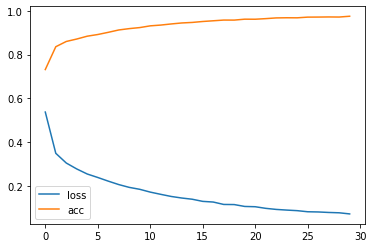

In [52]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['accuracy'])
plt.legend(['loss', 'acc'])
plt.savefig("learning-gender.png")
plt.show()
plt.close()

Text(0.5, 0, 'Female')

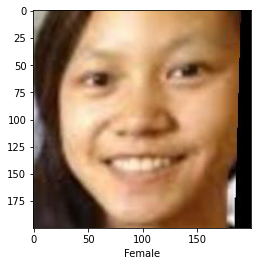

In [88]:
from keras.preprocessing.image import img_to_array
import cv2
import numpy as np
image= img_paths[10003]
img= cv2.imread(image)
img = cv2.resize(img, (64, 64))
img = img.astype("float") / 255.0
img = img_to_array(img)

img = np.expand_dims(img, axis=0)
probability= classifier.predict(img)
idxs= np.argsort(probability)[0][::-1][0]
image = mpimg.imread(image)
plt.imshow(image)
plt.xlabel(CLASSES[str(idxs)])